In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
import time
import calendar

In [4]:
df1 = pd.read_csv("/home/just/Scaricati/data_analisi.csv")
x = df1.iloc[:,:7]
y = df1.iloc[:,8]


In [5]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler,StandardScaler
for i in range(0,len(x.iloc[:,1])):
    if (x.iloc[i,0] == 'plug'):
        x.iloc[i,0] = 0
    else:
        if (x.iloc[i,0] == 'unplug'):
            x.iloc[i,0] = 1
    if (x.iloc[i,3] == 'False'):
        x.iloc[i,3] = 0
    else:
        if(x.iloc[i,3] == 'True'):
            x.iloc[i,3] = 1
scaler = MinMaxScaler()

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(x):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(y_train.shape[0],1))
y_test = scaler.transform(y_test.values.reshape(y_test.shape[0],1))

#X_scaled = scaler1.transform(x)
#y_scaled = scaler2.transform(y.values.reshape(-1,1))

#X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled ,test_size=0.3, random_state=42,shuffle = False)
svr_rbf = SVR(kernel = 'poly', gamma = 0.06, C = 105)
training = svr_rbf.fit(x_train,y_train.ravel())
y_pred = cross_val_predict(svr_rbf,x_test,y_test.ravel(), cv = 5)
#y_pred = training.predict(x_test)
y_unscaled = scaler.inverse_transform(y_test)
y_unscaled_predicted = scaler.inverse_transform(y_pred.reshape(-1,1))

r2 score:  0.5812150859837288
MAE:  0.13078117496081865
RMSE:  0.18195967512757355


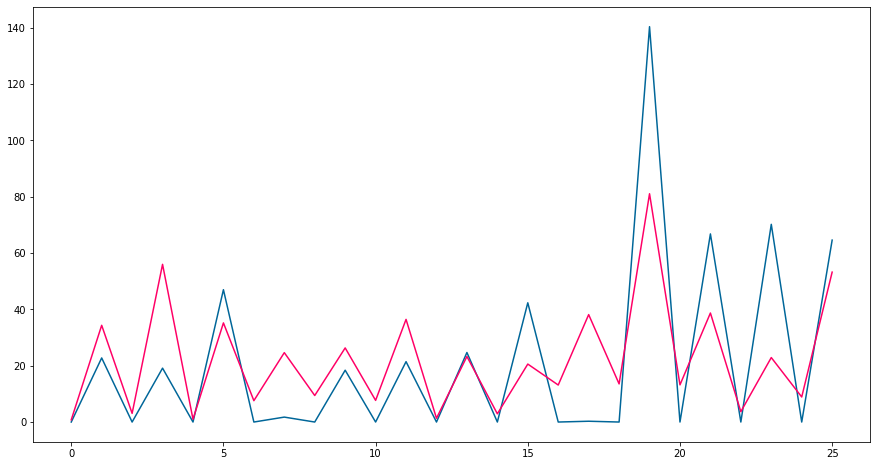

In [6]:
plt.figure(figsize=(15,8))
plt.plot(y_unscaled/60, label='Observed Values', color='#006699')
plt.plot(y_unscaled_predicted/60, label='Predicted Values', color='#ff0066')
import math
print("r2 score: ", r2_score(y_test,y_pred))
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

In [7]:
print(x_train)

[[-1.00000000e+00 -6.88890857e-01  1.04763899e+00 -1.26040771e+00
  -7.06367926e-01]
 [ 1.00000000e+00 -1.64185769e-01  1.36546206e+00 -1.26040771e+00
  -2.29473324e-01]
 [-1.00000000e+00 -6.88890857e-01 -8.59299398e-01 -7.57486409e-01
  -7.06367926e-01]
 [ 1.00000000e+00  1.92782445e+00  7.29815927e-01 -7.57486409e-01
   2.02941951e+00]
 [-1.00000000e+00 -6.88890857e-01 -8.59299398e-01  2.48356200e-01
  -7.06367926e-01]
 [ 1.00000000e+00  2.56343023e-01 -2.23653268e-01  2.48356200e-01
   1.85096302e-01]
 [-1.00000000e+00 -6.88890857e-01  7.29815927e-01  2.48356200e-01
  -7.06367926e-01]
 [ 1.00000000e+00  9.14752983e-02  1.04763899e+00  2.48356200e-01
   2.07568091e-02]
 [-1.00000000e+00 -6.88890857e-01 -5.41476333e-01  7.51277504e-01
  -7.06367926e-01]
 [ 1.00000000e+00  2.94622792e-01  9.41697970e-02  7.51277504e-01
   2.16878939e-01]
 [-1.00000000e+00 -6.88890857e-01 -5.41476333e-01  1.25419881e+00
  -7.06367926e-01]
 [ 1.00000000e+00  2.25617490e+00  1.04763899e+00  1.25419881e+00